In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import random
import pandas as pd
import time

In [2]:
def gen_initial_conditions(n):
    matriz = np.zeros((n, n))
    for i in range(n):
        matriz[i, i] = (i+1)/2

    gen_x = jnp.array([1.0 - i/n for i in range(n)])
    return matriz, gen_x


In [3]:
def f_rosenbrock(x):
    x = jnp.array(x)
    total = 0.0
    N = x.shape[0]

    for i in range(0, N-1, 2):
        total += 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2

    return total


In [4]:
calculate_grad_rosembrock = jax.grad(f_rosenbrock)

In [5]:
def gradient_with_armijo(iterations, x, f, λ_coef=1.0, c=1e-2, tol=1e-3):
    d = []
    x[0] = jnp.array(x[0])

    for k in range(iterations):
        gradient = calculate_grad_rosembrock(x[k])
        grad_norm = jnp.linalg.norm(gradient)
        if grad_norm < tol:
            break
        d_k = -gradient
        d.append(d_k)
        λ_k = λ_coef
        dir_derivative = jnp.dot(gradient, d_k)
        while f(x[k] + λ_k * d_k) > f(x[k]) + c * λ_k * dir_derivative:
            λ_k = λ_k / 2.0
            print(f"   λ reduzido → {λ_k:.6e}")
        x_next = x[k] + λ_k * d_k
        x.append(x_next)

        print (f"iter{k}")
    return x


In [ ]:
def gradient_armijo_with_metrics(iterations, x, tol=1e-3):
    start_time = time.time()
    x_history = gradient_with_armijo(iterations, x, f_rosenbrock)
    elapsed_time = time.time() - start_time
    
    f_values = [float(f_rosenbrock(xi)) for xi in x_history]
    grad_norms = [float(jnp.linalg.norm(jnp.array(calculate_grad_rosembrock(xi)))) for xi in x_history]
    
    iterations_done = len(x_history) - 1
    
    return {
        'x': x_history,
        'iterations': iterations_done,
        'time': elapsed_time,
        'f_values': f_values,
        'grad_norms': grad_norms,
        'final_f': f_values[-1],
        'final_grad_norm': grad_norms[-1] if grad_norms else 0
    }


In [ ]:
N_values = [1, 10, 100, 1000]
λ_values = [1.0]
results = []

for n in N_values:
    for 𝜆 in 𝜆_values:
        A, x = gen_initial_conditions(n)
        metrics = gradient_armijo_with_metrics(iterations=10000, x=x, tol=1e-3)
        
        results.append({
            'N': n,
            'λ': 𝜆,
            'Iterações': metrics['iterations'],
            'Tempo (s)': metrics['time'],
            'f(x_final)': metrics['final_f'],
            '||∇f(x_final)||': metrics['final_grad_norm'],
            'metrics': metrics
        })

df = pd.DataFrame([{k: v for k, v in r.items() if k != 'metrics'} for r in results])
print("="*70)
print("RESULTADOS - Método de Newton")
print("="*70)
print(df.to_string(index=False))
print("="*70)


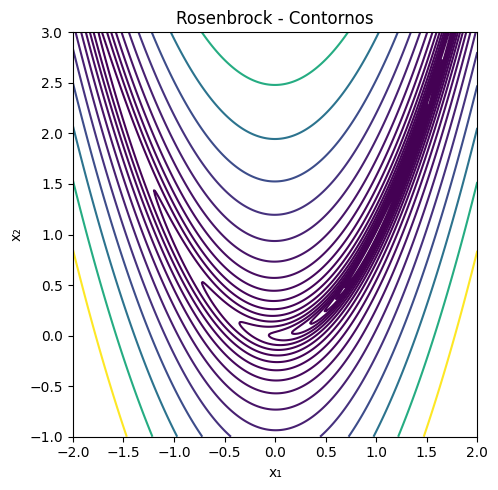

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock_2d(x, y):
    return 100*(y - x**2)**2 + (1 - x)**2

def quadratic_contours(ax, title):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock_2d(X, Y)
    
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_aspect('equal')

fig, axes = plt.subplots(1, 1, figsize=(6, 5))
quadratic_contours(axes, "Rosenbrock - Contornos")


plt.tight_layout()
plt.show()
